In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('bank_churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [6]:
df=df.drop(["CustomerId","RowNumber","Surname"],axis="columns")

In [7]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [9]:
df.isnull().values.any()

np.False_

In [10]:
df["Gender"]=df["Gender"].replace({'Male': 1,'Female': 0})

<ipython-input-10-2557863310>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"]=df["Gender"].replace({'Male': 1,'Female': 0})


In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df=pd.get_dummies(data=df,columns=["Geography"],dtype=int)

In [13]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [15]:
cols_to_scale=['CreditScore','Age','EstimatedSalary','Balance','Tenure']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [16]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1


In [17]:
df.shape

(10000, 13)

In [18]:
X=df.drop("Exited",axis="columns")
y=df["Exited"]

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [20]:
import tensorflow as tf
from tensorflow import keras

In [21]:
X_train.shape

(8000, 12)

In [24]:
model=keras.Sequential([
    keras.layers.Dense(8,input_shape=(12,),activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6827 - loss: 0.5976
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7864 - loss: 0.4903
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7878 - loss: 0.4704
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7954 - loss: 0.4469
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8123 - loss: 0.4306
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8241 - loss: 0.4057
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8313 - loss: 0.3918
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8154 - loss: 0.4064
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8297 - loss: 0.3839
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8329 - loss: 0.3875
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8419 - loss: 0.3698
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [25]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8794 - loss: 0.3197


[0.3181430399417877, 0.8784999847412109]

In [26]:
yp=model.predict(X_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.587993  ],
       [0.13337427],
       [0.29519194],
       [0.0234511 ],
       [0.14390546]], dtype=float32)

In [27]:
y_test[:5]

,Exited
4644,0
699,0
6625,0
5902,0
1712,0


In [28]:
y_pred=[]
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [29]:
y_pred[:5]

[1, 0, 0, 0, 0]

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print("classification report : \n",classification_report(y_test,y_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.89      0.96      0.93      1628
           1       0.76      0.50      0.61       372

    accuracy                           0.88      2000
   macro avg       0.83      0.73      0.77      2000
weighted avg       0.87      0.88      0.87      2000



Text(95.72222222222221, 0.5, 'Truth')

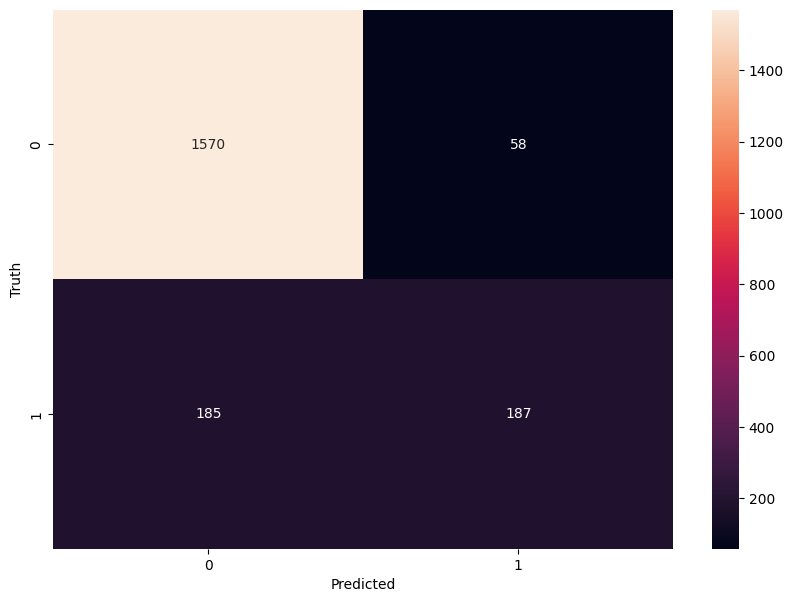

In [31]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')